In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
pc.config.cloudy_exe = '/usr/local/Cloudy/c25.00_rc2/source/cloudy.exe'

warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [2]:
# A function is defined that print out Cloudy input file for coronal model
def make_coronal(T, name='Coronal'):
    Min = pc.CloudyInput(f'../models/{name}_{np.log10(T):.2f}')
    Min.set_cste_density(0)
    Min.set_stop(('zone = 1'))
    Min.set_other(('coronal {} K'.format(T), 
                   'set dr 0', 
                   'Cosmic Rays Background'))
    Min.print_input()

In [3]:
# The 7 input model files are printed out
for T in np.logspace(2, 8, 7):
    make_coronal(T, name='Coronal1')

In [4]:
# Models are run
pc.run_cloudy(dir_='../models', n_proc=8, use_make=True, model_name='Coronal1')

In [5]:
# Model results are read into a list of CloudyModel objects
Ms = pc.load_models('../models/Coronal1_', read_emis=False, read_heatcool=True, cloudy_version_major=24)

In [6]:
len(Ms)

7

(0.0, 1e-21)

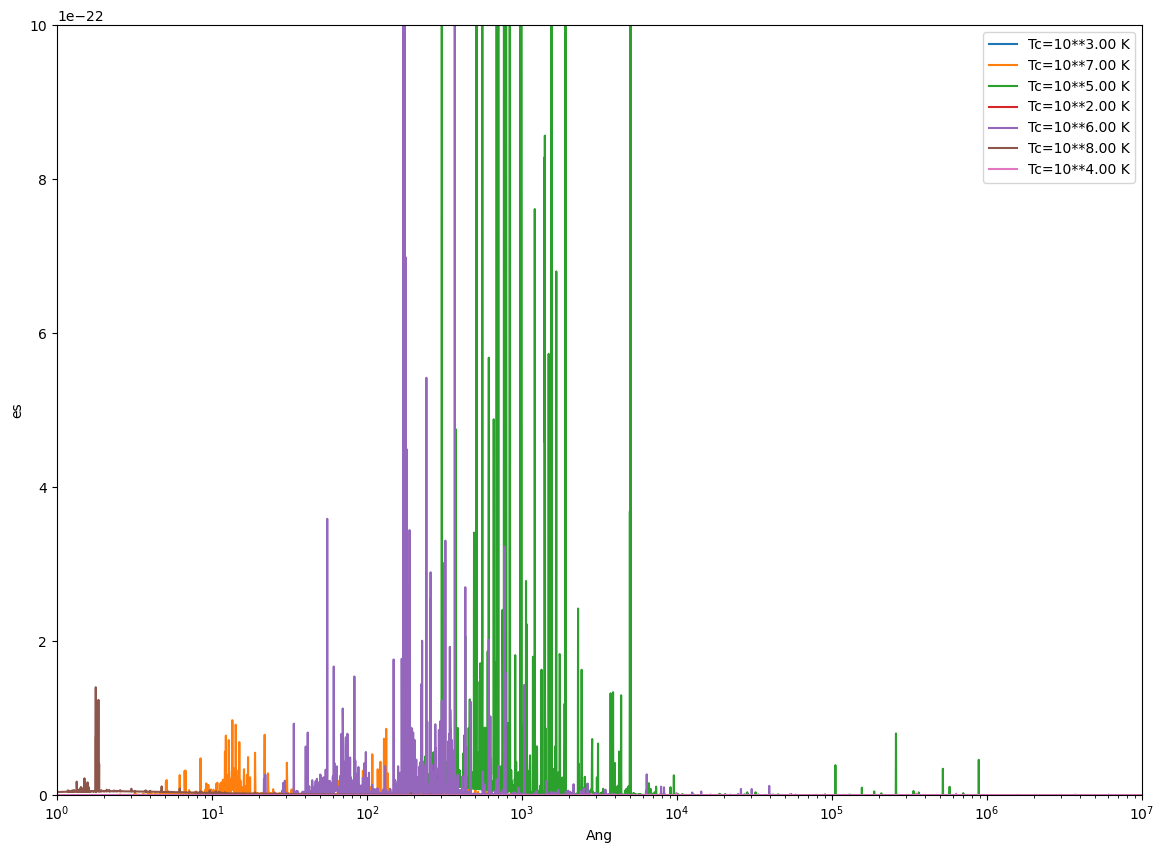

In [7]:
# Emitted spectra are plot into the same figure
f, ax = plt.subplots(figsize=(14, 10))
for M in Ms:
    M.plot_spectrum(label='Tc=10**{} K'.format(M.model_name_s.split('_')[1]), 
                    ax=ax, xunit='Ang', ylog=False)
ax.legend()
ax.set_xlim((1, 1e7))
ax.set_ylim((0, 1e-21))

(1e-32, 1e-19)

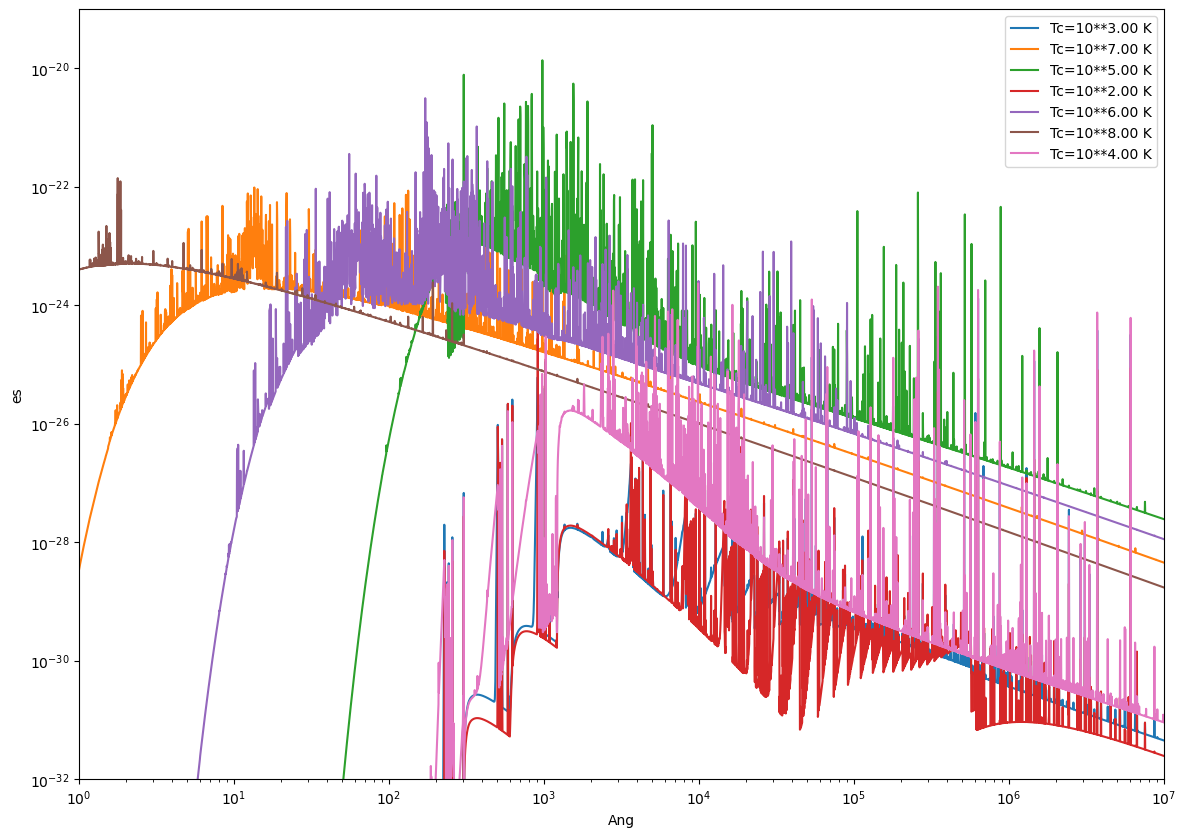

In [8]:
# Log units in Y are used
f, ax = plt.subplots(figsize=(14, 10))
for M in Ms:
    M.plot_spectrum(label='Tc=10**{} K'.format(M.model_name_s.split('_')[1]), ax=ax, xunit='Ang', )
ax.legend()
ax.set_xlim((1, 1e7))
ax.set_ylim((1e-32, 1e-19))

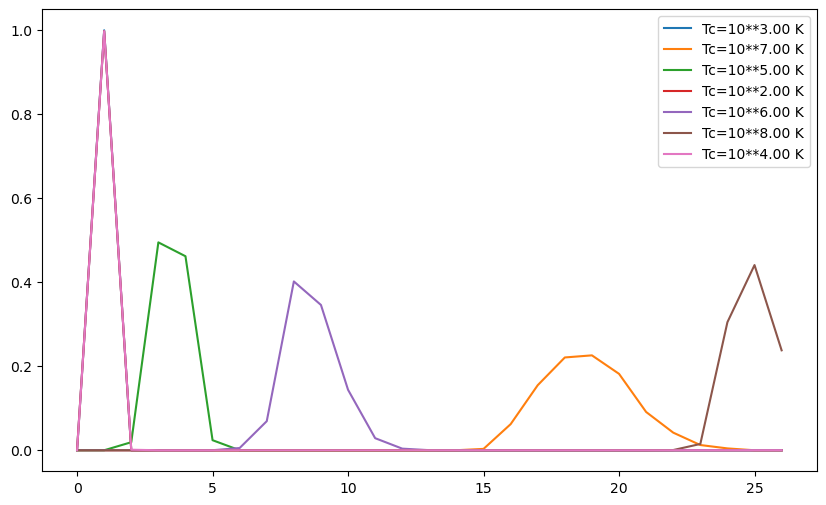

In [9]:
# The distribution of the ionization stages of Iron is plotted for different coronal temperatures
f, ax = plt.subplots(figsize=(10,6))
for M in Ms:
    Fe_ions = [M.get_ionic('Fe', i) for i in np.arange(27)]
    ax.plot(Fe_ions,label='Tc=10**{} K'.format(M.model_name_s.split('_')[1]))
ax.legend();

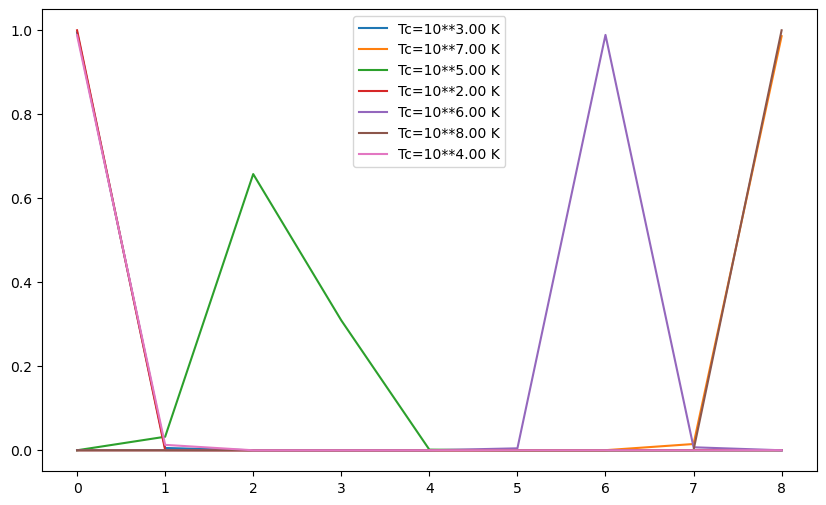

In [10]:
# The same for Oxygen
f, ax = plt.subplots(figsize=(10,6))
for M in Ms:
    O_ions = [M.get_ionic('O', i) for i in np.arange(9)]
    ax.plot(O_ions,label='Tc=10**{} K'.format(M.model_name_s.split('_')[1]))
ax.legend();

## Increase the resolution in Te

In [11]:
# The following will run 71 models 8 at a time. Change this according to your computer...
for T in np.logspace(2, 8, 71):
    make_coronal(T, name='Coronal')
pc.run_cloudy(dir_='../models', n_proc=8, use_make=True, model_name='Coronal_')

In [11]:
# Reading all the models
Ms = pc.load_models('../models/Coronal_', read_emis=False, read_heatcool=True, cloudy_version_major=24)

In [12]:
# Sorting the models using the electron temperature
Ms = sorted(Ms, key=lambda x:x.T0)

Text(0, 0.5, 'log Cooling')

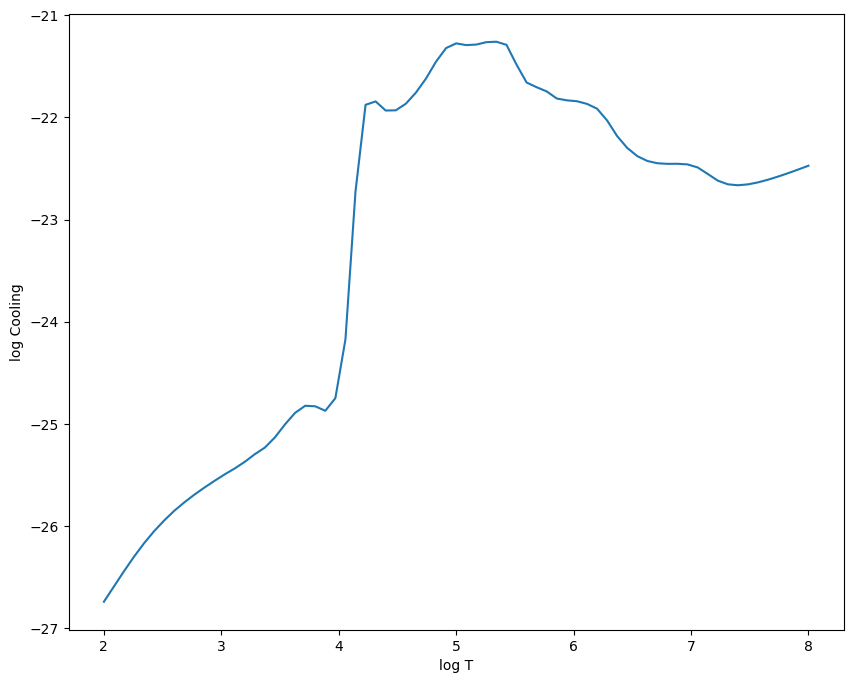

In [13]:
# PLoting the cooling in function of the temperature
f, ax = plt.subplots(figsize=(10,8))
cool = [M.cool for M in Ms]
T0 = [M.T0 for M in Ms]
ax.plot(np.log10(T0), np.log10(cool))
ax.set_xlabel('log T')
ax.set_ylabel('log Cooling')

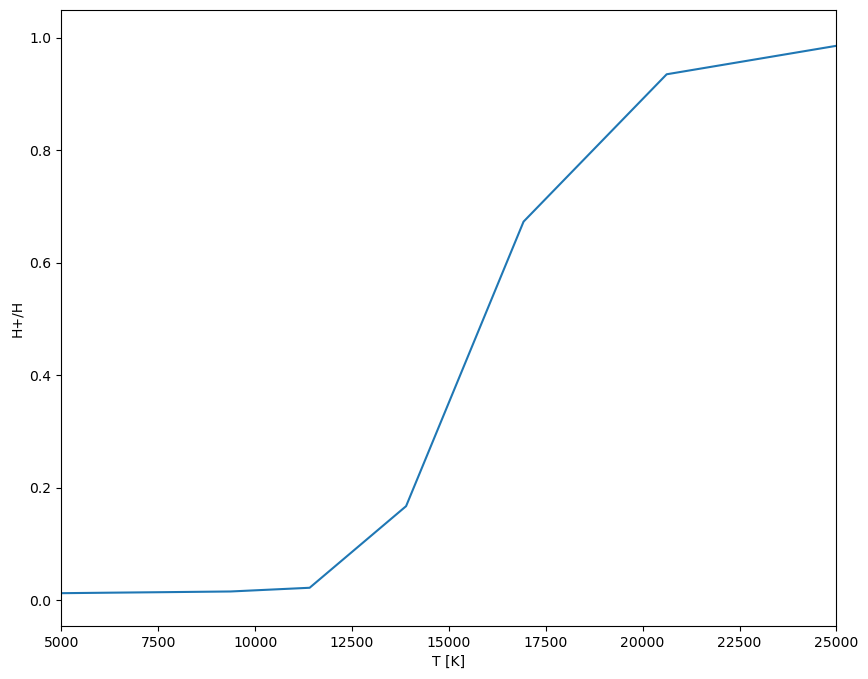

In [14]:
# Ionization fraction of Hydrogen
f, ax = plt.subplots(figsize=(10,8))
Hp = [M.get_ionic('H', 1) for M in Ms]
T0 = [M.T0 for M in Ms]
ax.plot(T0, Hp)
ax.set_xlabel('T [K]')
ax.set_ylabel('H+/H')
ax.set_xlim(5000, 25000);